In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor

In [2]:
credit_card_data=pd.read_csv('creditcard.csv')

In [3]:
# first 5 row
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# last 5 row
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


***Information of dataset***

In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#distribution of legit transactions and fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This dataset is highly imbalanced

0------> Normal tranc


1------> Fraud tranc

In [8]:
# seprating the data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# Statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions on basis of mean
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling 

Buid a sample dataset containing distribution of normal
tansac. and fraud transc.

Number of fraudulcent Transcation->  492

In [13]:
legit_sample=legit.sample(n=492)

Concat two DataFrame

In [14]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)


In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
48958,43853.0,-0.760110,-1.281646,-0.148581,-2.576437,0.439324,4.044207,-0.064404,0.686041,-2.577850,...,-0.342786,-0.703239,0.524481,0.951935,-0.205237,-0.336603,0.166273,0.062742,285.70,0
198549,132538.0,1.956849,0.404899,-2.312081,1.390014,0.989939,-0.665927,0.558165,-0.167775,-0.072088,...,0.018699,0.171710,-0.005786,0.569744,0.425609,-0.542092,-0.010489,-0.030451,21.80,0
206737,136347.0,1.890249,0.561095,-1.586741,3.535973,0.986080,-0.177919,0.621780,-0.076912,-1.530833,...,0.139246,0.155448,0.076712,0.696213,0.191474,0.021231,-0.107361,-0.064856,37.07,0
192346,129644.0,1.936535,0.341368,-1.649821,1.444080,0.414242,-1.153507,0.423601,-0.384534,0.094687,...,0.240606,0.805066,-0.075276,-0.153699,0.315464,-0.419060,0.022144,-0.015603,44.80,0
122333,76522.0,0.973487,-1.260284,1.210311,-0.666321,-1.474128,0.834116,-1.343899,0.405006,-0.569873,...,0.020354,0.369041,0.014829,-0.214658,-0.242417,1.142257,0.009061,0.032129,125.90,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset['Class'].value_counts() # 0 for legit and 1 for fraud

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95239.469512,0.111695,0.015656,0.066559,-0.058492,0.047839,0.011055,0.081299,-0.035839,0.045248,...,0.066706,-0.014457,0.032204,0.031600,-0.033334,0.015639,-0.004803,-0.005539,-0.011761,85.110244
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into features and target

In [19]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6   
48958    43853.0 -0.760110 -1.281646 -0.148581 -2.576437  0.439324  4.044207  \
198549  132538.0  1.956849  0.404899 -2.312081  1.390014  0.989939 -0.665927   
206737  136347.0  1.890249  0.561095 -1.586741  3.535973  0.986080 -0.177919   
192346  129644.0  1.936535  0.341368 -1.649821  1.444080  0.414242 -1.153507   
122333   76522.0  0.973487 -1.260284  1.210311 -0.666321 -1.474128  0.834116   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(Y)

48958     0
198549    0
206737    0
192346    0
122333    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data and Testing Data

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

20% data is splitted to training rest is to tesitng

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


Plotting distribution

In [24]:
cols=list()

***Model Training***

***Logistic Regression***

In [25]:
model=LogisticRegression()

In [26]:
# Training the logistic Regression model with training data
model.fit(X_train,Y_train)


LogisticRegression()

***Model Training ***

Random Forest

In [27]:
model1=RandomForestClassifier()
model1.fit(X_train,Y_train)


RandomForestClassifier()

In [28]:
model2=HistGradientBoostingClassifier()
model2.fit(X_train,Y_train)

HistGradientBoostingClassifier()

*Model Evaluation*-Logistic Regression 

Accuracy Score

In [29]:
# accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [30]:
print('Accuracy on training data : ',training_data_accuracy)


Accuracy on training data :  0.9466327827191868


94% accurate >75% is good accuracy

In [31]:
#acuuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [32]:
print('Accuracy on test data is: ' ,test_data_accuracy)

Accuracy on test data is:  0.9289340101522843


*Model Evaluation*-Random Forest

In [33]:
X_train_prediction1=model1.predict(X_train)
training_data_accuracy1=accuracy_score(X_train_prediction,Y_train)

In [34]:
print('Accuracy on training data of random forest is: ' ,training_data_accuracy1)

Accuracy on training data of random forest is:  0.9466327827191868


In [35]:
# HistGradientBoostingClassifier

In [36]:
X_train_prediction=model2.predict(X_train)
training_data_accuracy2=accuracy_score(X_train_prediction,Y_train)

In [37]:
print('Accuracy on training data of HistGradientBoostingClassifier is: ' ,training_data_accuracy2)


Accuracy on training data of HistGradientBoostingClassifier is:  1.0


Accuracy of different model


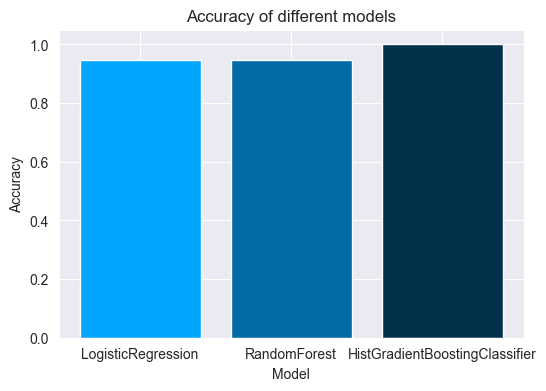

In [38]:
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of different models")
plt.bar(["LogisticRegression","RandomForest","HistGradientBoostingClassifier"]
,[training_data_accuracy,training_data_accuracy1,training_data_accuracy2],color=["#00A6FF","#006BA5","#00314C"])
plt.show()

Confusion matrix for each models

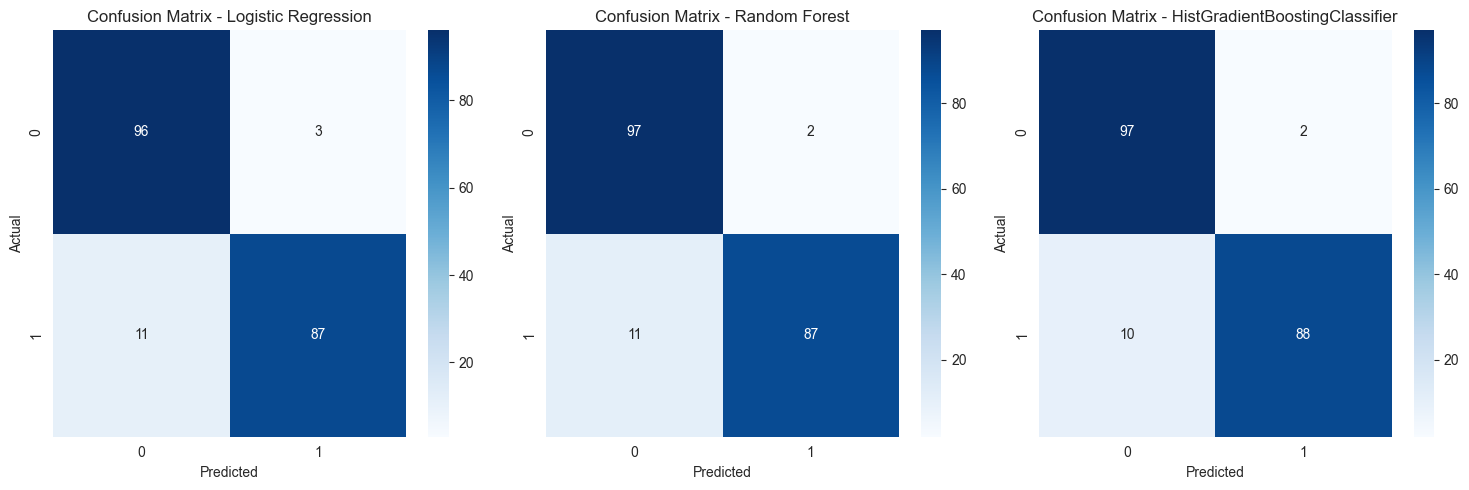

In [39]:
# Calculate the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(Y_test, X_test_prediction)

# Calculate the confusion matrix for Random Forest
X_test_prediction_rf = model1.predict(X_test)
cm_rf = confusion_matrix(Y_test, X_test_prediction_rf)

# Calculate the confusion matrix for HistGradientBoostingClassifier
X_test_prediction_hgb = model2.predict(X_test)
cm_hgb = confusion_matrix(Y_test, X_test_prediction_hgb)

# Create subplots to display the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the confusion matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the confusion matrix for Random Forest
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Plot the confusion matrix for HistGradientBoostingClassifier
sns.heatmap(cm_hgb, annot=True, cmap='Blues', fmt='d', ax=axes[2])
axes[2].set_title('Confusion Matrix - HistGradientBoostingClassifier')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()
